<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Multiple_Linear_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code is addopted from:

How to do Multiple Linear Regression in Python| Jupyter Notebook|Sklearn

https://youtu.be/WngoqVB6cXw

and

https://github.com/YungChunLu/UCI-Power-Plant/blob/master/PySpark%20-%20Power%20Plant.ipynb


#Background:
Power generation is a complex process, and understanding and predicting power output is an important element in managing a plant and its connection to the power grid. The operators of a regional power grid create predictions of power demand based on historical information and environmental factors (e.g., temperature). They then compare the predictions against available resources (e.g., coal, natural gas, nuclear, solar, wind, hydro power plants). Power generation technologies such as solar and wind are highly dependent on environmental conditions, and all generation technologies are subject to planned and unplanned maintenance.

Here is an real-world example of predicted demand (on two time scales), actual demand, and available resources from the California power grid: http://www.caiso.com/Pages/TodaysOutlook.aspx


The challenge for a power grid operator is how to handle a shortfall in available resources versus actual demand. There are three solutions to a power shortfall: build more base load power plants (this process can take many years to decades of planning and construction), buy and import power from other regional power grids (this choice can be very expensive and is limited by the power transmission interconnects between grids and the excess power available from other grids), or turn on small Peaker or Peaking Power Plants. Because grid operators need to respond quickly to a power shortfall to avoid a power outage, grid operators rely on a combination of the last two choices. In this exercise, we'll focus on the last choice.

Because they supply power only occasionally, the power supplied by a peaker power plant commands a much higher price per kilowatt hour than power from a power grid's base power plants. A peaker plant may operate many hours a day, or it may operate only a few hours per year, depending on the condition of the region's electrical grid. Because of the cost of building an efficient power plant, if a peaker plant is only going to be run for a short or highly variable time it does not make economic sense to make it as efficient as a base load power plant. In addition, the equipment and fuels used in base load plants are often unsuitable for use in peaker plants because the fluctuating conditions would severely strain the equipment.

The power output of a peaker power plant varies depending on environmental conditions, so the business problem is predicting the power output of a peaker power plant as a function of the environmental conditions -- since this would enable the grid operator to make economic tradeoffs about the number of peaker plants to turn on (or whether to buy expensive power from another grid).

#Problem Definition:
Given the background information, predic power output as a function of envionmental conditions.

#Create a DataFrame from the data:
The schema definition from UCI appears below:

AT = Atmospheric Temperature in C

V = Exhaust Vacuum Speed

AP = Atmospheric Pressure

RH = Relative Humidity

PE = Power Output. **This is the value we are trying to predict given the measurements above.**

Data to download:
https://github.com/YungChunLu/UCI-Power-Plant/blob/master/data.csv

or

https://www.kaggle.com/datasets/rinichristy/combined-cycle-power-plant-data-set-uci-data


In [156]:
import pandas as pd
import numpy as np


In [157]:
data_df=pd.read_csv('https://github.com/YungChunLu/UCI-Power-Plant/blob/master/data.csv?raw=true')
data_df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [158]:
x=data_df.drop(['PE'], axis=1).values
x

array([[   8.34,   40.77, 1010.84,   90.01],
       [  23.64,   58.49, 1011.4 ,   74.2 ],
       [  29.74,   56.9 , 1007.15,   41.91],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66],
       [  17.65,   59.87, 1018.58,   94.65],
       [  23.68,   51.3 , 1011.86,   71.24]])

In [159]:
y=data_df['PE'].values
y

array([480.48, 445.75, 438.76, ..., 465.96, 450.93, 451.67])

Import linear model from sklearn

In [160]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=123)

In [161]:
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, Lasso, HuberRegressor
reg=LinearRegression(fit_intercept=False)
reg.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [162]:
reg.coef_

array([-1.67055627, -0.27771313,  0.50292868, -0.10002024])

In [163]:
reg.intercept_

0.0

In [164]:
y_pred=reg.predict(x_test)

Evaluation metric

In [165]:
from sklearn.metrics import r2_score
rez=r2_score(y_test, y_pred)
print(rez)

0.9122539468971966


Some other metrics:

In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.015330011598479
Mean Squared Error: 25.68490177496981
Root Mean Squared Error: 5.068027404717718


Text(0, 0.5, 'Predicted')

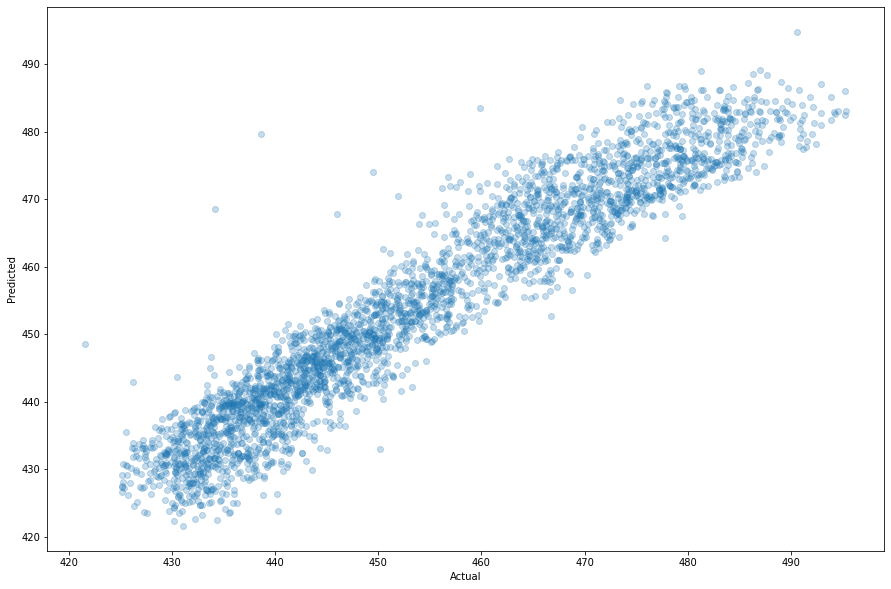

In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred,alpha=0.25)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [168]:
pred_y_diff=pd.DataFrame({'Actual values':y_test, 'Predicted values': y_pred, 'Difference':y_test-y_pred})
pred_y_diff

,Actual values,Predicted values,Difference
0,444.75,442.370456,2.379544
1,486.76,481.577372,5.182628
2,431.03,435.381606,-4.351606
3,437.93,447.129981,-9.199981
4,456.75,462.698002,-5.948002
...,...,...,...
3153,438.39,442.290260,-3.900260
3154,428.05,433.157417,-5.107417
3155,465.47,470.843834,-5.373834
3156,435.94,431.902853,4.037147


Non linear regressions

In [169]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf', C=145)
reg.fit(x_train, y_train)
y_pred=reg.predict(x_test)

rez=r2_score(y_test, y_pred)
print(rez)

0.9247515602516103


In [170]:
from sklearn.neighbors import KNeighborsRegressor
#https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train, y_train)
y_pred=neigh.predict(x_test)

rez=r2_score(y_test, y_pred)
print(rez)

0.9411887334103471


In [171]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

rez=r2_score(y_test, y_pred)
print(rez)

0.9262967032326936


In [172]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=50, random_state=0)
regr.fit(x_train, y_train)
y_pred=regr.predict(x_test)

rez=r2_score(y_test, y_pred)
print(rez)

0.9605528355436571


Text(0, 0.5, 'Predicted')

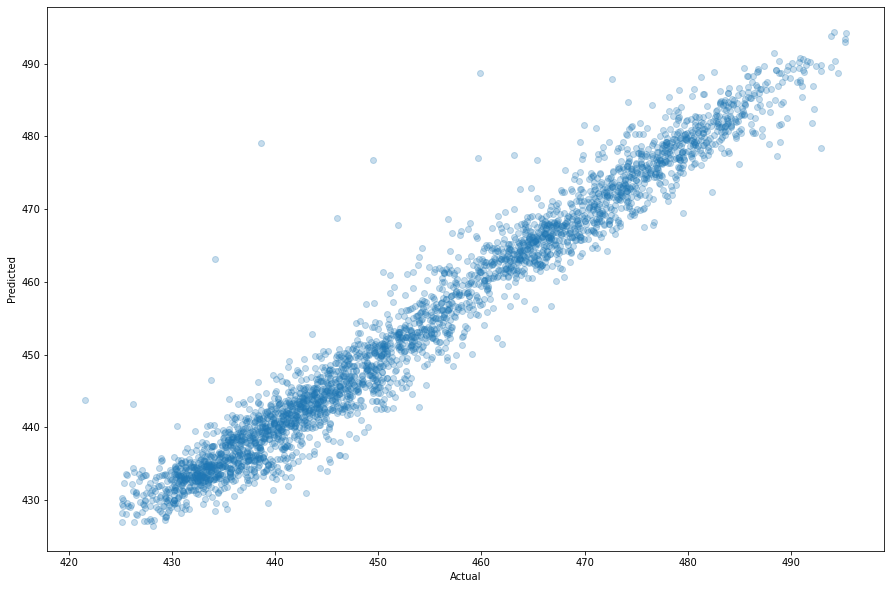

In [173]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred,alpha=0.25)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [174]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor


# Training Regressors
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(max_depth=50, random_state=1)
reg3 = KNeighborsRegressor(n_neighbors=2)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(x_train, y_train)
y_pred=ereg.predict(x_test)

rez=r2_score(y_test, y_pred)
print(rez)

0.9574157866005052


In [175]:
from sklearn.neural_network import MLPRegressor

MLPregr = MLPRegressor(hidden_layer_sizes=(50,10,2,), activation= 'identity', random_state=1, max_iter=2500, solver='lbfgs').fit(x_train, y_train)
y_pred=MLPregr.predict(x_test)

rez=r2_score(y_test, y_pred)
print(rez)

0.9286242971942232


#Hyper Parameter Tuning

https://michael-fuchs-python.netlify.app/2021/02/10/nn-multi-layer-perceptron-regressor-mlpregressor/

In [176]:
param_grid = {
    'hidden_layer_sizes': [(50,10,), (50,10,2,), (10,10,)],
    'activation': ['identity', 'relu'],
    'alpha': [0.0001, 0.00005],
    'learning_rate': ['constant'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(MLPregr, param_grid, n_jobs= -1, cv=5, verbose=2)
grid.fit(x_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
y_pred=grid.predict(x_test)

rez=r2_score(y_test, y_pred)
print(rez)